## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

from sklearn import datasets 
from sklearn.cluster import KMeans 
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

## OVERVIEW

In [2]:
df = pd.read_csv('dataset\evnts_clean.csv')

In [3]:
df.head()

,user_id,event_id,organization_id,transaction_date,event_type,organization_type,event_category,user_type,user_location,event_location,gender,age_when_register,price,total_ticket_sold
0,4f3e46a6e94452b566553485b619d2f305bd9d875d4f6d...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:04:32,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,2
1,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:11:44,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,1
2,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:11:50,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,1
3,b1fc4cf5297d6639937d7806cf8ff626e4fdef6548c892...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:24:59,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,6
4,1da4ae70dde95b9d83c7586d1af62599cb01c4fc660f63...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:53:11,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54023 entries, 0 to 54022
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            54023 non-null  object 
 1   event_id           54023 non-null  object 
 2   organization_id    54023 non-null  object 
 3   transaction_date   54023 non-null  object 
 4   event_type         54023 non-null  object 
 5   organization_type  54023 non-null  object 
 6   event_category     54023 non-null  object 
 7   user_type          54023 non-null  object 
 8   user_location      54023 non-null  object 
 9   event_location     54023 non-null  object 
 10  gender             54023 non-null  object 
 11  age_when_register  54023 non-null  int64  
 12  price              54023 non-null  float64
 13  total_ticket_sold  54023 non-null  int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 5.8+ MB


In [5]:
pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes.values, 
              'null' : [df[i].isna().sum() for i in df.columns],
              'nullPct' : [((df[i].isna().sum()/len(df[i]))*100).round(1) for i in df.columns],
              'Nunique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample()) for i in df.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
0,user_id,object,0,0.0,32171,[29fc9db39a138526f457862090dd2f75dae85d3ca4b22...
1,event_id,object,0,0.0,811,[9bfc95c39e3e2e152e221256d1b14244f99254a315d0f...
2,organization_id,object,0,0.0,274,[24320d595ecbee8e436e215121b5efe6cc0b44487fad0...
3,transaction_date,object,0,0.0,49299,[2019-09-25 05:46:17]
4,event_type,object,0,0.0,1,[Event]
5,organization_type,object,0,0.0,7,[Event Promotor]
6,event_category,object,0,0.0,296,[Workshop - Seminar - Tech Startup - Conference]
7,user_type,object,0,0.0,2,[Guest]
8,user_location,object,0,0.0,38,[Balikpapan]
9,event_location,object,0,0.0,23,[Indonesia]


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age_when_register,54023.0,22.534883,5.343978,18.0,21.0,21.0,21.0,63.0
price,54023.0,82542.244137,310627.372425,0.0,0.0,0.0,70000.0,8100000.0
total_ticket_sold,54023.0,1.623623,2.734707,1.0,1.0,1.0,1.0,134.0


In [7]:
df.describe(include='object').T

,count,unique,top,freq
user_id,54023,32171,74b15dc9dd3a61432731b8edd5588b6cb35ac12ba720d9...,804
event_id,54023,811,9441a919384943d46915a2efaaad637bb0ca08cf0de0d9...,4397
organization_id,54023,274,1af57e2c0b4cd813117b114b25c36938b219e172830653...,4413
transaction_date,54023,49299,2020-05-22 13:56:49,31
event_type,54023,1,Event,54023
organization_type,54023,7,Event Organizer and Promotor,26748
event_category,54023,296,Webinar,5619
user_type,54023,2,Guest,30907
user_location,54023,38,Jakarta,21089
event_location,54023,23,Jakarta,25342


In [8]:
amount = []
for i, j in zip(df['price'], df['total_ticket_sold']):
    amount.append(i * j)

In [9]:
# Creating total_paid features

df['total_paid'] = amount

In [10]:
profit = []
for i, j in zip(df['price'], df['total_ticket_sold']):
    if i >= 60000:
        profit.append((i * 5/100) * j)
    else :
        profit.append(3000 * j)

In [11]:
# Creating profit features

df['profit'] = profit

In [12]:
df.head()

,user_id,event_id,organization_id,transaction_date,event_type,organization_type,event_category,user_type,user_location,event_location,gender,age_when_register,price,total_ticket_sold,total_paid,profit
0,4f3e46a6e94452b566553485b619d2f305bd9d875d4f6d...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:04:32,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,2,150000.0,7500.0
1,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:11:44,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,1,100000.0,5000.0
2,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:11:50,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,1,100000.0,5000.0
3,b1fc4cf5297d6639937d7806cf8ff626e4fdef6548c892...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:24:59,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,6,450000.0,22500.0
4,1da4ae70dde95b9d83c7586d1af62599cb01c4fc660f63...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:53:11,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,2,150000.0,7500.0


In [13]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

## KMEANS CLUSTERING

In [114]:
# Creating new df

df_clust = df.copy()
df_clust['age_when_register'] = df_clust['age_when_register'].astype('int64')

In [119]:
# Split registered and Guest

df_reg = df_clust[df_clust['user_type']=='Registered']
df_gst = df_clust[df_clust['user_type']=='Guest']

### OVERALL 

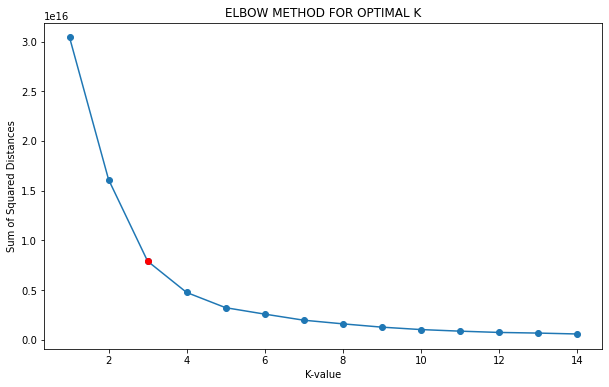

In [124]:
# Making Scree Plot (Elbow)

Sum_of_squared_distances = []
K = range(1,15) # Range of 1 to 15
for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(df_clust[['age_when_register', 'price', 'total_ticket_sold', 'total_paid', 'profit']])
    Sum_of_squared_distances.append(model.inertia_)
    
plt.figure(figsize = (10,6))
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('K-value')
plt.ylabel('Sum of Squared Distances')
plt.title('ELBOW METHOD FOR OPTIMAL K')
plt.plot(K[2], Sum_of_squared_distances[2], 'ro')
plt.show()

> Best k is 3.

In [125]:
model_KM = KMeans(n_clusters = 3, max_iter = 10000)
model_KM.fit(df_clust[['age_when_register', 'price', 'total_ticket_sold', 'total_paid', 'profit']])

KMeans(max_iter=10000, n_clusters=3)

In [126]:
model_KM.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [127]:
df_clust['cluster'] = model_KM.predict(df_clust[['age_when_register', 'price', 'total_ticket_sold', 'total_paid', 'profit']])
df_clust.head()

,user_id,event_id,organization_id,transaction_date,event_type,organization_type,event_category,user_type,user_location,event_location,gender,age_when_register,price,total_ticket_sold,total_paid,profit,cluster
0,4f3e46a6e94452b566553485b619d2f305bd9d875d4f6d...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:04:32,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,2,150000.0,7500.0,0
1,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:11:44,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,1,100000.0,5000.0,0
2,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:11:50,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,1,100000.0,5000.0,0
3,b1fc4cf5297d6639937d7806cf8ff626e4fdef6548c892...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:24:59,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,6,450000.0,22500.0,0
4,1da4ae70dde95b9d83c7586d1af62599cb01c4fc660f63...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:53:11,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,2,150000.0,7500.0,0


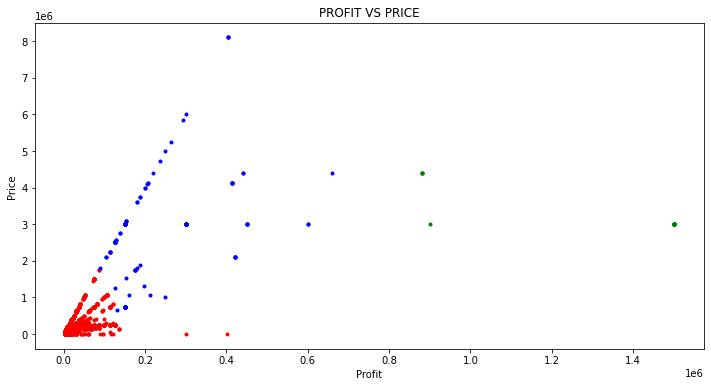

In [224]:
plt.figure(figsize=(12,6))
plt.plot(df_clust['profit'][df_clust['cluster']==0], df_clust['price'][df_clust['cluster']==0], 'r.')
plt.plot(df_clust['profit'][df_clust['cluster']==1], df_clust['price'][df_clust['cluster']==1], 'b.')
plt.plot(df_clust['profit'][df_clust['cluster']==2], df_clust['price'][df_clust['cluster']==2], 'g.')

plt.xlabel('Profit')
plt.ylabel('Price')
plt.title('PROFIT VS PRICE')
plt.show()

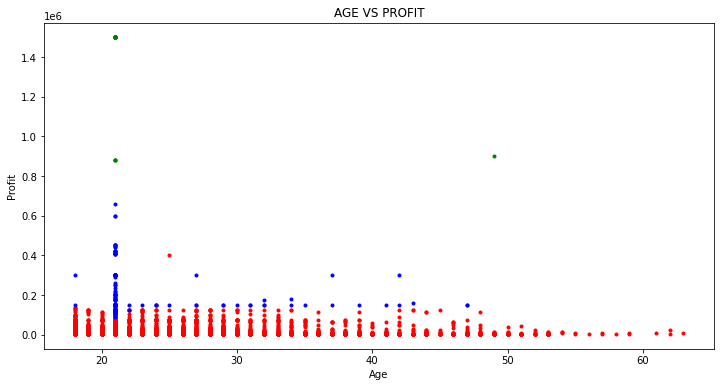

In [236]:
plt.figure(figsize=(12,6))
plt.plot(df_clust['age_when_register'][df_clust['cluster']==0], df_clust['profit'][df_clust['cluster']==0], 'r.')
plt.plot(df_clust['age_when_register'][df_clust['cluster']==1], df_clust['profit'][df_clust['cluster']==1], 'b.')
plt.plot(df_clust['age_when_register'][df_clust['cluster']==2], df_clust['profit'][df_clust['cluster']==2], 'g.')

plt.xlabel('Age')
plt.ylabel('Profit')
plt.title('AGE VS PROFIT')
plt.show()

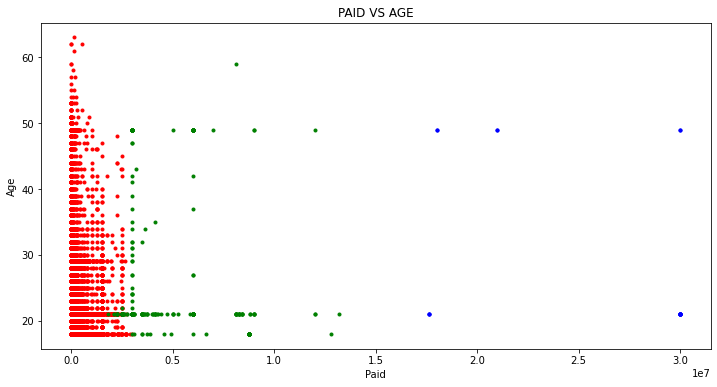

In [131]:
plt.figure(figsize=(12,6))
plt.plot(df_clust['total_paid'][df_clust['cluster']==0], df_clust['age_when_register'][df_clust['cluster']==0], 'r.') 
plt.plot(df_clust['total_paid'][df_clust['cluster']==1], df_clust['age_when_register'][df_clust['cluster']==1], 'g.')
plt.plot(df_clust['total_paid'][df_clust['cluster']==2], df_clust['age_when_register'][df_clust['cluster']==2], 'b.')

plt.xlabel('Paid')
plt.ylabel('Age')
plt.title('PAID VS AGE')
plt.show()

### REGISTERED

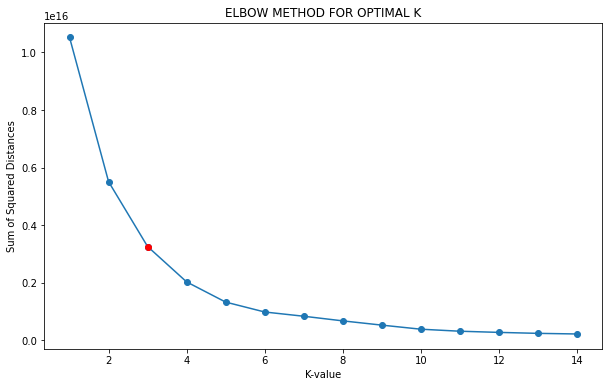

In [117]:
# Making Scree Plot (Elbow) - Registered

Sum_of_squared_distances = []
K = range(1,15) # Range of 1 to 15
for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(df_reg[['age_when_register', 'price', 'total_ticket_sold', 'total_paid', 'profit']])
    Sum_of_squared_distances.append(model.inertia_)
    
plt.figure(figsize = (10,6))
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('K-value')
plt.ylabel('Sum of Squared Distances')
plt.title('ELBOW METHOD FOR OPTIMAL K')
plt.plot(K[2], Sum_of_squared_distances[2], 'ro')
plt.show()

> Best k is 3.

In [133]:
model_KM_reg = KMeans(n_clusters = 3, max_iter = 10000)
model_KM_reg.fit(df_reg[['age_when_register', 'price', 'total_ticket_sold', 'total_paid', 'profit']])

KMeans(max_iter=10000, n_clusters=3)

In [134]:
df_reg['cluster'] = model_KM_reg.predict(df_reg[['age_when_register', 'price', 'total_ticket_sold', 'total_paid', 'profit']])
df_reg.head()

,user_id,event_id,organization_id,transaction_date,event_type,organization_type,event_category,user_type,user_location,event_location,gender,age_when_register,price,total_ticket_sold,total_paid,profit,cluster
1,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:11:44,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,1,100000.0,5000.0,0
2,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:11:50,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,1,100000.0,5000.0,0
7,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 05:15:37,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,3,300000.0,15000.0,0
8,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 05:58:08,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,3,300000.0,15000.0,0
9,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 06:22:07,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,5,500000.0,25000.0,0


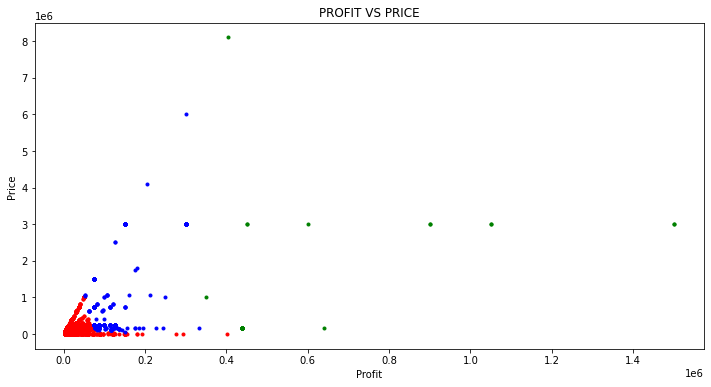

In [135]:
plt.figure(figsize=(12,6))
plt.plot(df_reg['profit'][df_reg['cluster']==0], df_reg['price'][df_reg['cluster']==0], 'r.')
plt.plot(df_reg['profit'][df_reg['cluster']==1], df_reg['price'][df_reg['cluster']==1], 'g.')
plt.plot(df_reg['profit'][df_reg['cluster']==2], df_reg['price'][df_reg['cluster']==2], 'b.')

plt.xlabel('Profit')
plt.ylabel('Price')
plt.title('PROFIT VS PRICE')
plt.show()

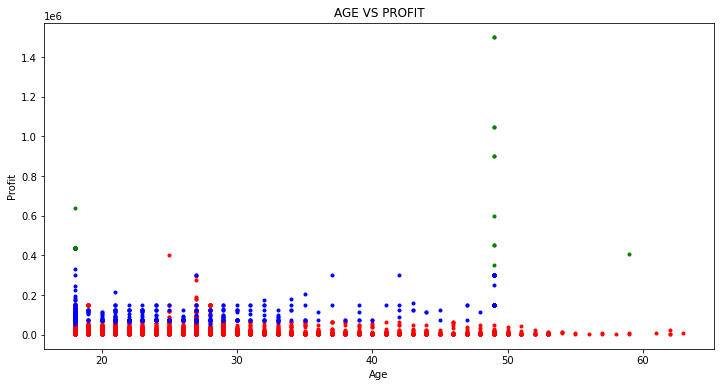

In [136]:
plt.figure(figsize=(12,6))
plt.plot(df_reg['age_when_register'][df_reg['cluster']==0], df_reg['profit'][df_reg['cluster']==0], 'r.')
plt.plot(df_reg['age_when_register'][df_reg['cluster']==1], df_reg['profit'][df_reg['cluster']==1], 'g.')
plt.plot(df_reg['age_when_register'][df_reg['cluster']==2], df_reg['profit'][df_reg['cluster']==2], 'b.')

plt.xlabel('Age')
plt.ylabel('Profit')
plt.title('AGE VS PROFIT')
plt.show()

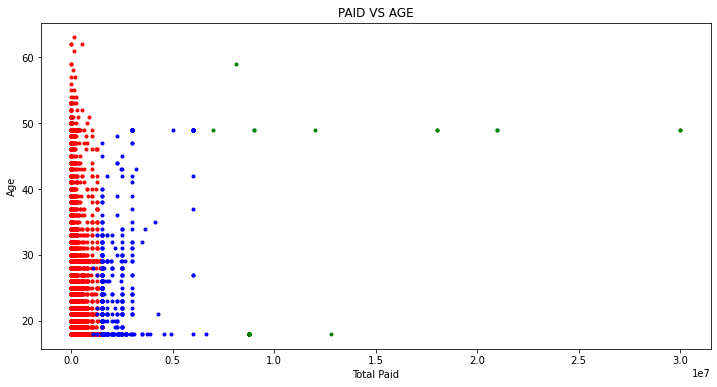

In [137]:
plt.figure(figsize=(12,6))
plt.plot(df_reg['total_paid'][df_reg['cluster']==0], df_reg['age_when_register'][df_reg['cluster']==0], 'r.') # cluster 1
plt.plot(df_reg['total_paid'][df_reg['cluster']==1], df_reg['age_when_register'][df_reg['cluster']==1], 'g.') # cluster 2
plt.plot(df_reg['total_paid'][df_reg['cluster']==2], df_reg['age_when_register'][df_reg['cluster']==2], 'b.') # cluster 3

plt.xlabel('Total Paid')
plt.ylabel('Age')
plt.title('PAID VS AGE')
plt.show()

### GUEST

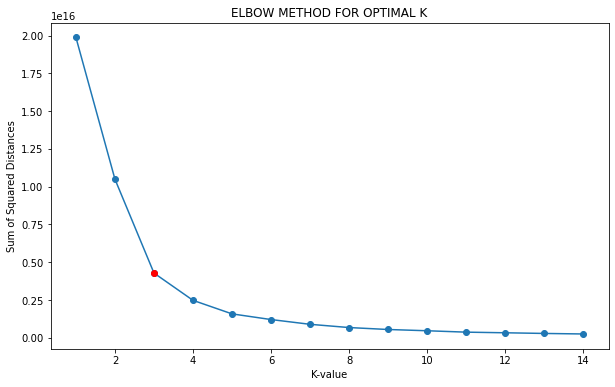

In [138]:
# Making Scree Plot (Elbow) - Guest

Sum_of_squared_distances = []
K = range(1,15) # Range of 1 to 15
for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(df_gst[['age_when_register', 'price', 'total_ticket_sold', 'total_paid', 'profit']])
    Sum_of_squared_distances.append(model.inertia_)
    
plt.figure(figsize = (10,6))
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('K-value')
plt.ylabel('Sum of Squared Distances')
plt.title('ELBOW METHOD FOR OPTIMAL K')
plt.plot(K[2], Sum_of_squared_distances[2], 'ro')
plt.show()

> Best k is 3.

In [141]:
model_KM_gst = KMeans(n_clusters = 3, max_iter = 10000)
model_KM_gst.fit(df_gst[['age_when_register', 'price', 'total_ticket_sold', 'total_paid', 'profit']])

KMeans(max_iter=10000, n_clusters=3)

In [142]:
model_KM_gst.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [143]:
df_gst['cluster'] = model_KM_gst.predict(df_gst[['age_when_register', 'price', 'total_ticket_sold', 'total_paid', 'profit']])
df_gst.head()

,user_id,event_id,organization_id,transaction_date,event_type,organization_type,event_category,user_type,user_location,event_location,gender,age_when_register,price,total_ticket_sold,total_paid,profit,cluster
0,4f3e46a6e94452b566553485b619d2f305bd9d875d4f6d...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:04:32,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,2,150000.0,7500.0,0
3,b1fc4cf5297d6639937d7806cf8ff626e4fdef6548c892...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:24:59,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,6,450000.0,22500.0,0
4,1da4ae70dde95b9d83c7586d1af62599cb01c4fc660f63...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:53:11,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,2,150000.0,7500.0,0
5,7dddb95cc3da557d3c0b993d4ad148182cdccd5833387e...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 05:12:57,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,4,300000.0,15000.0,0
6,ebee53b4d8aa0e1d82385d191b9a6b27c21125689f99f7...,42fbc58b0793f7a78da3aed5023efa91bdfbf219963614...,58b192b21f26e839d98afc2dce1e03e354756c73ed3f57...,2019-01-01 05:13:45,Event,Event Organizer,Wedding Expo - Exhibition,Guest,Jakarta,Jakarta,none,21,15000.0,2,30000.0,6000.0,0


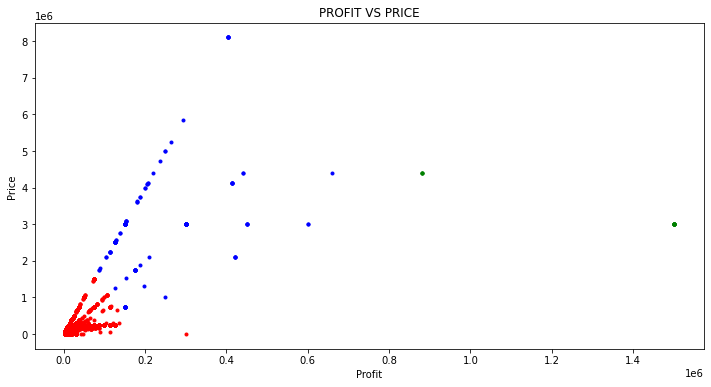

In [144]:
plt.figure(figsize=(12,6))
plt.plot(df_gst['profit'][df_gst['cluster']==0], df_gst['price'][df_gst['cluster']==0], 'r.')
plt.plot(df_gst['profit'][df_gst['cluster']==1], df_gst['price'][df_gst['cluster']==1], 'g.')
plt.plot(df_gst['profit'][df_gst['cluster']==2], df_gst['price'][df_gst['cluster']==2], 'b.')

plt.xlabel('Profit')
plt.ylabel('Price')
plt.title('PROFIT VS PRICE')
plt.show()

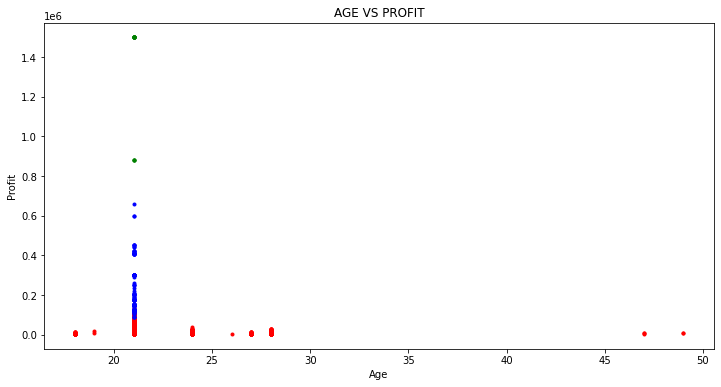

In [145]:
plt.figure(figsize=(12,6))
plt.plot(df_gst['age_when_register'][df_gst['cluster']==0], df_gst['profit'][df_gst['cluster']==0], 'r.')
plt.plot(df_gst['age_when_register'][df_gst['cluster']==1], df_gst['profit'][df_gst['cluster']==1], 'g.')
plt.plot(df_gst['age_when_register'][df_gst['cluster']==2], df_gst['profit'][df_gst['cluster']==2], 'b.')

plt.xlabel('Age')
plt.ylabel('Profit')
plt.title('AGE VS PROFIT')
plt.show()

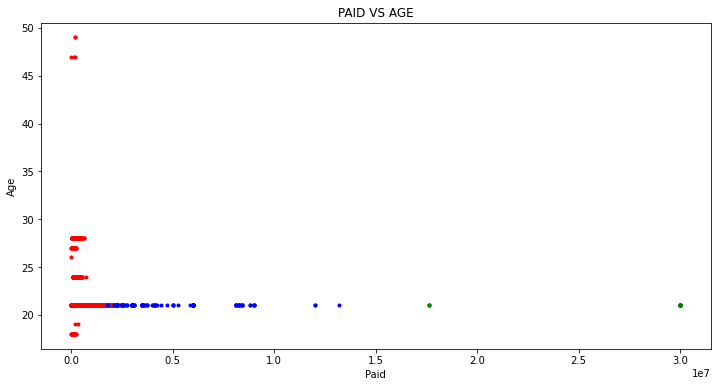

In [146]:
plt.figure(figsize=(12,6))
plt.plot(df_gst['total_paid'][df_gst['cluster']==0], df_gst['age_when_register'][df_gst['cluster']==0], 'r.') 
plt.plot(df_gst['total_paid'][df_gst['cluster']==1], df_gst['age_when_register'][df_gst['cluster']==1], 'g.') 
plt.plot(df_gst['total_paid'][df_gst['cluster']==2], df_gst['age_when_register'][df_gst['cluster']==2], 'b.') 

plt.xlabel('Paid')
plt.ylabel('Age')
plt.title('PAID VS AGE')
plt.show()

## RFM ANALYSIS

> RFM (Recency, Frequency, Monetary) is a very Simple Technique that we can apply it very easy and get the super useful analysis for our Customer Segmentation. It considers *recency, frequency* and *monetary* values for each customer, combines them and then groups them into different customer segments for easy recall and campaign targeting.

> Recency (R) as days since last purchase: How many days ago was their last purchase ? Deduct most recent purchase date from today to calculate the recency value. 

> Frequency (F) as total number of transactions. Calculate frequency of purchases, count each particular EventId.

> Monetary (M) as total money spent. How many Rp. has this user spent? Simply total up the money from all transactions to get the M value.

### OVERALL

In [147]:
# group by customers and check last date of purshace

recency = df_clust.groupby(by='user_id', as_index=False)['transaction_date'].max()
recency.columns = ['user_id','LastPurchaseDate']
recency.head()

,user_id,LastPurchaseDate
0,000140bd498ce1c9eeae046aa37b205cc65d2595ed526a...,2019-07-26 12:42:27
1,0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b8...,2020-05-22 13:56:44
2,00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece...,2020-06-08 20:57:50
3,0009bb2348a3a05d6b7dcc54394ff580c10440319f3878...,2019-09-11 07:58:30
4,000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba...,2020-02-17 03:13:51


In [148]:
# Check current date

now = pd.to_datetime(df_clust['transaction_date'].max())
recency['LastPurchaseDate'] = pd.to_datetime(recency['LastPurchaseDate'])

In [149]:
# Calculate Recency

recency['Recency'] = recency['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency.head()

,user_id,LastPurchaseDate,Recency
0,000140bd498ce1c9eeae046aa37b205cc65d2595ed526a...,2019-07-26 12:42:27,340
1,0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b8...,2020-05-22 13:56:44,39
2,00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece...,2020-06-08 20:57:50,22
3,0009bb2348a3a05d6b7dcc54394ff580c10440319f3878...,2019-09-11 07:58:30,293
4,000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba...,2020-02-17 03:13:51,134


In [150]:
# Drop LastPurchaseDate

recency = recency.drop('LastPurchaseDate', axis=1)
recency.head()

,user_id,Recency
0,000140bd498ce1c9eeae046aa37b205cc65d2595ed526a...,340
1,0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b8...,39
2,00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece...,22
3,0009bb2348a3a05d6b7dcc54394ff580c10440319f3878...,293
4,000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba...,134


In [151]:
# drop duplicates

df_clust.drop_duplicates(subset=['user_id', 'event_id'], keep="first", inplace=True)

#calculate frequency of purchases

frequency = df_clust.groupby(by=['user_id'], as_index=False)['event_id'].count()
frequency.columns = ['user_id','Frequency']
frequency.head()

,user_id,Frequency
0,000140bd498ce1c9eeae046aa37b205cc65d2595ed526a...,1
1,0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b8...,1
2,00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece...,1
3,0009bb2348a3a05d6b7dcc54394ff580c10440319f3878...,1
4,000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba...,1


In [152]:
monetary = df_clust.groupby(by='user_id',as_index=False).agg({'total_paid': 'sum'})
monetary.columns = ['user_id','Monetary']
monetary.head()

,user_id,Monetary
0,000140bd498ce1c9eeae046aa37b205cc65d2595ed526a...,0.0
1,0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b8...,0.0
2,00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece...,0.0
3,0009bb2348a3a05d6b7dcc54394ff580c10440319f3878...,25000.0
4,000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba...,0.0


In [153]:
#merge recency dataframe with frequency dataframe

temp = recency.merge(frequency, on='user_id')
temp.head()

,user_id,Recency,Frequency
0,000140bd498ce1c9eeae046aa37b205cc65d2595ed526a...,340,1
1,0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b8...,39,1
2,00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece...,22,1
3,0009bb2348a3a05d6b7dcc54394ff580c10440319f3878...,293,1
4,000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba...,134,1


In [154]:
#merge with monetary dataframe to get a table with the 3 columns

rfm = temp.merge(monetary,on='user_id')

#use CustomerID as index

rfm.set_index('user_id',inplace=True)

In [155]:
rfm.head()

,Recency,Frequency,Monetary
user_id,,,
000140bd498ce1c9eeae046aa37b205cc65d2595ed526a01cf1e5fdecb1a9a11,340,1,0.0
0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b851d2098e25a3eef599,39,1,0.0
00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece5b5150892463fddc53,22,1,0.0
0009bb2348a3a05d6b7dcc54394ff580c10440319f3878bf3dd7373af556b3b6,293,1,25000.0
000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba1f25a646f86e55c091,134,1,0.0


### REGISTERED

In [156]:
# group by customers and check last date of purshace

recency_reg = df_reg.groupby(by='user_id', as_index=False)['transaction_date'].max()
recency_reg.columns = ['user_id','LastPurchaseDate']
recency_reg.head()

,user_id,LastPurchaseDate
0,000d596f61a329e66ddc8b83cf4a92eb2278646f26de22...,2019-01-03 03:14:18
1,000e9d2d78e491e609fb4e51a50a618f7b7993f9b9fa26...,2019-04-05 06:59:11
2,00146b96f857a3f3f780b7e16ea8d5d2694f0dd373cad3...,2020-01-20 03:51:14
3,0018ea7b3a2c90c06b832395fad89f56118044018673ef...,2020-03-03 06:00:19
4,001c27164a52edca6eddd042aba5368b23d42a154c1b25...,2020-04-09 04:11:06


In [157]:
# Check current date

now = pd.to_datetime(df_reg['transaction_date'].max())
recency_reg['LastPurchaseDate'] = pd.to_datetime(recency_reg['LastPurchaseDate'])

In [158]:
# Calculate Recency

recency_reg['Recency'] = recency_reg['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_reg.head()

,user_id,LastPurchaseDate,Recency
0,000d596f61a329e66ddc8b83cf4a92eb2278646f26de22...,2019-01-03 03:14:18,544
1,000e9d2d78e491e609fb4e51a50a618f7b7993f9b9fa26...,2019-04-05 06:59:11,452
2,00146b96f857a3f3f780b7e16ea8d5d2694f0dd373cad3...,2020-01-20 03:51:14,162
3,0018ea7b3a2c90c06b832395fad89f56118044018673ef...,2020-03-03 06:00:19,119
4,001c27164a52edca6eddd042aba5368b23d42a154c1b25...,2020-04-09 04:11:06,82


In [159]:
# Drop LastPurchaseDate

recency_reg = recency_reg.drop('LastPurchaseDate', axis=1)
recency_reg.head()

,user_id,Recency
0,000d596f61a329e66ddc8b83cf4a92eb2278646f26de22...,544
1,000e9d2d78e491e609fb4e51a50a618f7b7993f9b9fa26...,452
2,00146b96f857a3f3f780b7e16ea8d5d2694f0dd373cad3...,162
3,0018ea7b3a2c90c06b832395fad89f56118044018673ef...,119
4,001c27164a52edca6eddd042aba5368b23d42a154c1b25...,82


In [160]:
# drop duplicates

df_reg.drop_duplicates(subset=['user_id', 'event_id'], keep="first", inplace=True)

#calculate frequency of purchases

frequency_reg = df_reg.groupby(by=['user_id'], as_index=False)['event_id'].count()
frequency_reg.columns = ['user_id','Frequency']
frequency_reg.head()

,user_id,Frequency
0,000d596f61a329e66ddc8b83cf4a92eb2278646f26de22...,1
1,000e9d2d78e491e609fb4e51a50a618f7b7993f9b9fa26...,1
2,00146b96f857a3f3f780b7e16ea8d5d2694f0dd373cad3...,1
3,0018ea7b3a2c90c06b832395fad89f56118044018673ef...,1
4,001c27164a52edca6eddd042aba5368b23d42a154c1b25...,3


In [161]:
monetary_reg = df_reg.groupby(by='user_id',as_index=False).agg({'total_paid': 'sum'})
monetary_reg.columns = ['user_id','Monetary']
monetary_reg.head()

,user_id,Monetary
0,000d596f61a329e66ddc8b83cf4a92eb2278646f26de22...,200000.0
1,000e9d2d78e491e609fb4e51a50a618f7b7993f9b9fa26...,875000.0
2,00146b96f857a3f3f780b7e16ea8d5d2694f0dd373cad3...,30000.0
3,0018ea7b3a2c90c06b832395fad89f56118044018673ef...,1500000.0
4,001c27164a52edca6eddd042aba5368b23d42a154c1b25...,259000.0


In [162]:
#merge recency dataframe with frequency dataframe

temp_reg = recency_reg.merge(frequency_reg, on='user_id')
temp_reg.head()

,user_id,Recency,Frequency
0,000d596f61a329e66ddc8b83cf4a92eb2278646f26de22...,544,1
1,000e9d2d78e491e609fb4e51a50a618f7b7993f9b9fa26...,452,1
2,00146b96f857a3f3f780b7e16ea8d5d2694f0dd373cad3...,162,1
3,0018ea7b3a2c90c06b832395fad89f56118044018673ef...,119,1
4,001c27164a52edca6eddd042aba5368b23d42a154c1b25...,82,3


In [163]:
#merge with monetary dataframe to get a table with the 3 columns

reg_rfm = temp_reg.merge(monetary_reg,on='user_id')

#use CustomerID as index

reg_rfm.set_index('user_id',inplace=True)

In [164]:
reg_rfm.head()

,Recency,Frequency,Monetary
user_id,,,
000d596f61a329e66ddc8b83cf4a92eb2278646f26de22b2744d91f087655c48,544,1,200000.0
000e9d2d78e491e609fb4e51a50a618f7b7993f9b9fa2689f1710431a9e9466b,452,1,875000.0
00146b96f857a3f3f780b7e16ea8d5d2694f0dd373cad33b123e3dd6d5890dbf,162,1,30000.0
0018ea7b3a2c90c06b832395fad89f56118044018673ef302de87d69db0f4a56,119,1,1500000.0
001c27164a52edca6eddd042aba5368b23d42a154c1b25969775e72c26bba5c8,82,3,259000.0


### GUEST

In [165]:
# group by customers and check last date of purshace

recency_gst = df_gst.groupby(by='user_id', as_index=False)['transaction_date'].max()
recency_gst.columns = ['user_id','LastPurchaseDate']
recency_gst.head()

,user_id,LastPurchaseDate
0,000140bd498ce1c9eeae046aa37b205cc65d2595ed526a...,2019-07-26 12:42:27
1,0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b8...,2020-05-22 13:56:44
2,00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece...,2020-06-08 20:57:50
3,0009bb2348a3a05d6b7dcc54394ff580c10440319f3878...,2019-09-11 07:58:30
4,000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba...,2020-02-17 03:13:51


In [166]:
# Check current date

now = pd.to_datetime(df_gst['transaction_date'].max())
recency_gst['LastPurchaseDate'] = pd.to_datetime(recency_gst['LastPurchaseDate'])

In [167]:
# Calculate Recency

recency_gst['Recency'] = recency_gst['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_gst.head()

,user_id,LastPurchaseDate,Recency
0,000140bd498ce1c9eeae046aa37b205cc65d2595ed526a...,2019-07-26 12:42:27,340
1,0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b8...,2020-05-22 13:56:44,39
2,00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece...,2020-06-08 20:57:50,22
3,0009bb2348a3a05d6b7dcc54394ff580c10440319f3878...,2019-09-11 07:58:30,293
4,000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba...,2020-02-17 03:13:51,134


In [168]:
# Drop LastPurchaseDate

recency_gst = recency_gst.drop('LastPurchaseDate', axis=1)
recency_gst.head()

,user_id,Recency
0,000140bd498ce1c9eeae046aa37b205cc65d2595ed526a...,340
1,0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b8...,39
2,00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece...,22
3,0009bb2348a3a05d6b7dcc54394ff580c10440319f3878...,293
4,000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba...,134


In [169]:
# drop duplicates

df_gst.drop_duplicates(subset=['user_id', 'event_id'], keep="first", inplace=True)

#calculate frequency of purchases

frequency_gst = df_gst.groupby(by=['user_id'], as_index=False)['event_id'].count()
frequency_gst.columns = ['user_id','Frequency']
frequency_gst.head()

,user_id,Frequency
0,000140bd498ce1c9eeae046aa37b205cc65d2595ed526a...,1
1,0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b8...,1
2,00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece...,1
3,0009bb2348a3a05d6b7dcc54394ff580c10440319f3878...,1
4,000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba...,1


In [170]:
monetary_gst = df_gst.groupby(by='user_id',as_index=False).agg({'total_paid': 'sum'})
monetary_gst.columns = ['user_id','Monetary']
monetary_gst.head()

,user_id,Monetary
0,000140bd498ce1c9eeae046aa37b205cc65d2595ed526a...,0.0
1,0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b8...,0.0
2,00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece...,0.0
3,0009bb2348a3a05d6b7dcc54394ff580c10440319f3878...,25000.0
4,000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba...,0.0


In [171]:
#merge recency dataframe with frequency dataframe

temp_gst = recency_gst.merge(frequency_gst, on='user_id')
temp_gst.head()

,user_id,Recency,Frequency
0,000140bd498ce1c9eeae046aa37b205cc65d2595ed526a...,340,1
1,0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b8...,39,1
2,00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece...,22,1
3,0009bb2348a3a05d6b7dcc54394ff580c10440319f3878...,293,1
4,000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba...,134,1


In [172]:
#merge with monetary dataframe to get a table with the 3 columns

gst_rfm = temp_gst.merge(monetary_gst,on='user_id')

#use CustomerID as index

gst_rfm.set_index('user_id',inplace=True)

In [173]:
gst_rfm.head()

,Recency,Frequency,Monetary
user_id,,,
000140bd498ce1c9eeae046aa37b205cc65d2595ed526a01cf1e5fdecb1a9a11,340,1,0.0
0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b851d2098e25a3eef599,39,1,0.0
00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece5b5150892463fddc53,22,1,0.0
0009bb2348a3a05d6b7dcc54394ff580c10440319f3878bf3dd7373af556b3b6,293,1,25000.0
000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba1f25a646f86e55c091,134,1,0.0


## RFM - KMEANS 

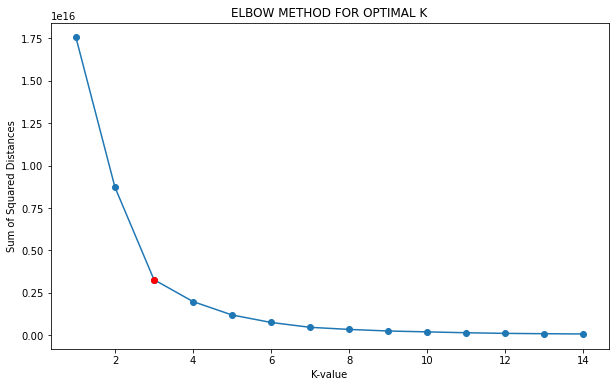

In [174]:
# Making Scree Plot (Elbow) - Overall

Sum_of_squared_distances = []
K = range(1,15) # Range of 1 to 15
for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(rfm[['Frequency', 'Monetary']])
    Sum_of_squared_distances.append(model.inertia_)
    
plt.figure(figsize = (10,6))
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('K-value')
plt.ylabel('Sum of Squared Distances')
plt.title('ELBOW METHOD FOR OPTIMAL K')
plt.plot(K[2], Sum_of_squared_distances[2], 'ro')
plt.show()

In [175]:
model_KM_ovr = KMeans(n_clusters = 3, max_iter = 10000)
model_KM_ovr.fit(rfm[['Frequency', 'Monetary']])

KMeans(max_iter=10000, n_clusters=3)

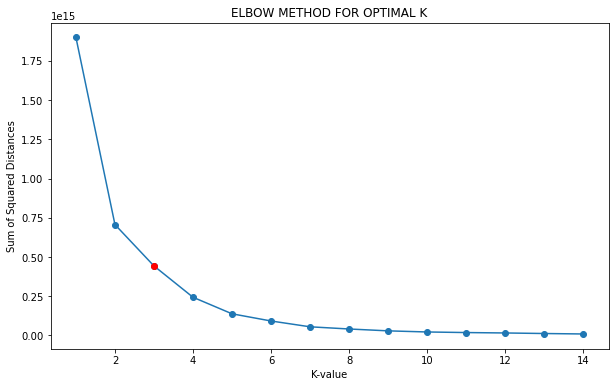

In [176]:
# Making Scree Plot (Elbow) - Registered

Sum_of_squared_distances = []
K = range(1,15) # Range of 1 to 15
for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(reg_rfm[['Frequency', 'Monetary']])
    Sum_of_squared_distances.append(model.inertia_)
    
plt.figure(figsize = (10,6))
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('K-value')
plt.ylabel('Sum of Squared Distances')
plt.title('ELBOW METHOD FOR OPTIMAL K')
plt.plot(K[2], Sum_of_squared_distances[2], 'ro')
plt.show()

In [177]:
model_KM_rfm_reg = KMeans(n_clusters = 3, max_iter = 10000)
model_KM_rfm_reg.fit(reg_rfm[['Frequency', 'Monetary']])

KMeans(max_iter=10000, n_clusters=3)

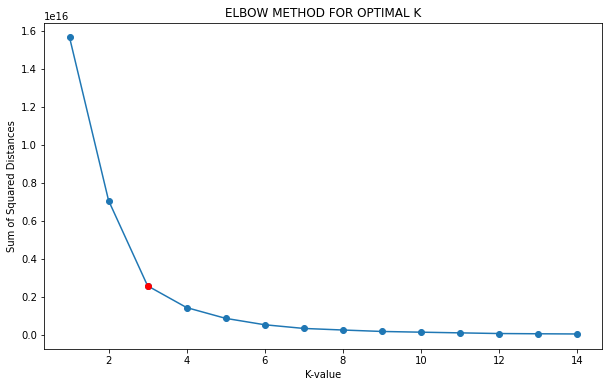

In [178]:
# Making Scree Plot (Elbow) - Guest

Sum_of_squared_distances = []
K = range(1,15) # Range of 1 to 15
for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(gst_rfm[['Frequency', 'Monetary']])
    Sum_of_squared_distances.append(model.inertia_)
    
plt.figure(figsize = (10,6))
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('K-value')
plt.ylabel('Sum of Squared Distances')
plt.title('ELBOW METHOD FOR OPTIMAL K')
plt.plot(K[2], Sum_of_squared_distances[2], 'ro')
plt.show()

In [179]:
model_KM_rfm_gst = KMeans(n_clusters = 3, max_iter = 10000)
model_KM_rfm_gst.fit(gst_rfm[['Frequency', 'Monetary']])

KMeans(max_iter=10000, n_clusters=3)

In [180]:
# Predict cluster on Overall

rfm['cluster'] = model_KM_ovr.predict(rfm[['Frequency', 'Monetary']])
rfm.head()

,Recency,Frequency,Monetary,cluster
user_id,,,,
000140bd498ce1c9eeae046aa37b205cc65d2595ed526a01cf1e5fdecb1a9a11,340,1,0.0,0
0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b851d2098e25a3eef599,39,1,0.0,0
00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece5b5150892463fddc53,22,1,0.0,0
0009bb2348a3a05d6b7dcc54394ff580c10440319f3878bf3dd7373af556b3b6,293,1,25000.0,0
000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba1f25a646f86e55c091,134,1,0.0,0


In [181]:
rfm['cluster'].value_counts()

0    31053
2     1105
1       13
Name: cluster, dtype: int64

In [183]:
# Predict cluster on Registered

reg_rfm['cluster'] = model_KM_rfm_reg.predict(reg_rfm[['Frequency', 'Monetary']])
reg_rfm.head()

,Recency,Frequency,Monetary,cluster
user_id,,,,
000d596f61a329e66ddc8b83cf4a92eb2278646f26de22b2744d91f087655c48,544,1,200000.0,0
000e9d2d78e491e609fb4e51a50a618f7b7993f9b9fa2689f1710431a9e9466b,452,1,875000.0,0
00146b96f857a3f3f780b7e16ea8d5d2694f0dd373cad33b123e3dd6d5890dbf,162,1,30000.0,0
0018ea7b3a2c90c06b832395fad89f56118044018673ef302de87d69db0f4a56,119,1,1500000.0,1
001c27164a52edca6eddd042aba5368b23d42a154c1b25969775e72c26bba5c8,82,3,259000.0,0


In [184]:
reg_rfm['cluster'].value_counts()

0    7327
1     445
2       1
Name: cluster, dtype: int64

In [185]:
# Predict cluster on Guest

gst_rfm['cluster'] = model_KM_rfm_gst.predict(gst_rfm[['Frequency', 'Monetary']])
gst_rfm.head()

,Recency,Frequency,Monetary,cluster
user_id,,,,
000140bd498ce1c9eeae046aa37b205cc65d2595ed526a01cf1e5fdecb1a9a11,340,1,0.0,0
0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b851d2098e25a3eef599,39,1,0.0,0
00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece5b5150892463fddc53,22,1,0.0,0
0009bb2348a3a05d6b7dcc54394ff580c10440319f3878bf3dd7373af556b3b6,293,1,25000.0,0
000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba1f25a646f86e55c091,134,1,0.0,0


In [186]:
gst_rfm['cluster'].value_counts()

0    23734
2      652
1       12
Name: cluster, dtype: int64

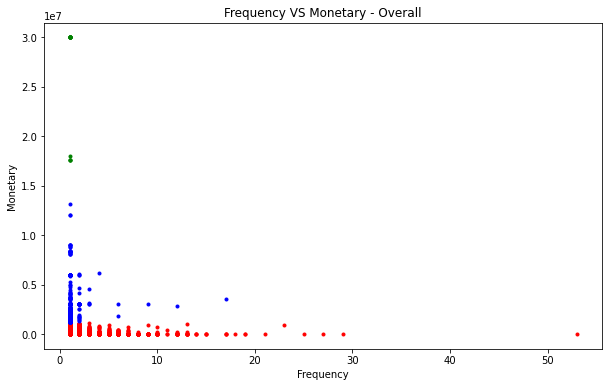

In [235]:
plt.figure(figsize = (10,6))
plt.plot(rfm['Frequency'][rfm['cluster'] == 0], 
         rfm['Monetary'][rfm['cluster'] == 0], 'r.')
plt.plot(rfm['Frequency'][rfm['cluster'] == 1], 
         rfm['Monetary'][rfm['cluster'] == 1], 'g.')
plt.plot(rfm['Frequency'][rfm['cluster'] == 2], 
         rfm['Monetary'][rfm['cluster'] == 2], 'b.')
plt.title('Frequency VS Monetary - Overall')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

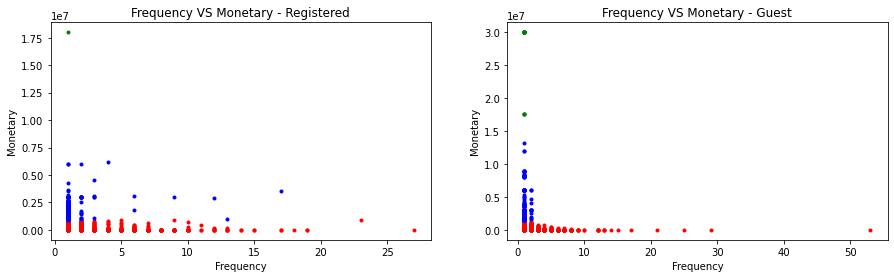

In [234]:
# FM

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))
ax1.plot(reg_rfm['Frequency'][reg_rfm['cluster'] == 0], 
         reg_rfm['Monetary'][reg_rfm['cluster'] == 0], 'r.')
ax1.plot(reg_rfm['Frequency'][reg_rfm['cluster'] == 1], 
         reg_rfm['Monetary'][reg_rfm['cluster'] == 1], 'b.')
ax1.plot(reg_rfm['Frequency'][reg_rfm['cluster'] == 2], 
         reg_rfm['Monetary'][reg_rfm['cluster'] == 2], 'g.')

ax2.plot(gst_rfm['Frequency'][gst_rfm['cluster'] == 0], 
         gst_rfm['Monetary'][gst_rfm['cluster'] == 0], 'r.')
ax2.plot(gst_rfm['Frequency'][gst_rfm['cluster'] == 1], 
         gst_rfm['Monetary'][gst_rfm['cluster'] == 1], 'g.')
ax2.plot(gst_rfm['Frequency'][gst_rfm['cluster'] == 2], 
         gst_rfm['Monetary'][gst_rfm['cluster'] == 2], 'b.')

ax1.set_title('Frequency VS Monetary - Registered')
ax2.set_title('Frequency VS Monetary - Guest')

ax1.set_xlabel('Frequency'), ax2.set_xlabel('Frequency')
ax1.set_ylabel('Monetary'), ax2.set_ylabel('Monetary')
plt.show()

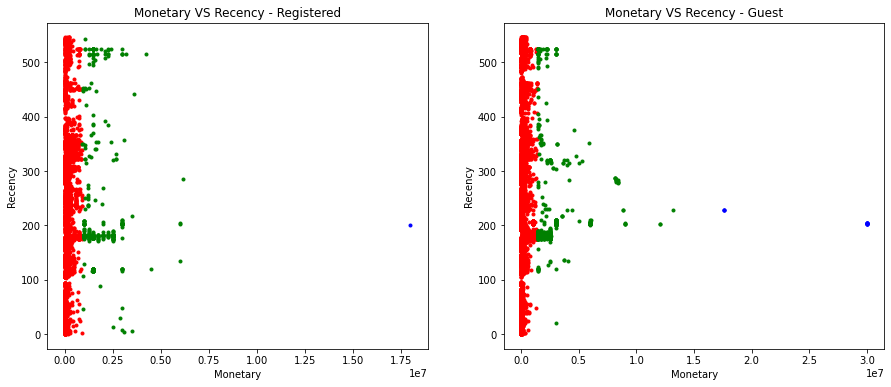

In [189]:
# MR

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
ax1.plot(reg_rfm['Monetary'][reg_rfm['cluster'] == 0], 
         reg_rfm['Recency'][reg_rfm['cluster'] == 0], 'r.')
ax1.plot(reg_rfm['Monetary'][reg_rfm['cluster'] == 1], 
         reg_rfm['Recency'][reg_rfm['cluster'] == 1], 'g.')
ax1.plot(reg_rfm['Monetary'][reg_rfm['cluster'] == 2], 
         reg_rfm['Recency'][reg_rfm['cluster'] == 2], 'b.')

ax2.plot(gst_rfm['Monetary'][gst_rfm['cluster'] == 0], 
         gst_rfm['Recency'][gst_rfm['cluster'] == 0], 'r.')
ax2.plot(gst_rfm['Monetary'][gst_rfm['cluster'] == 1], 
         gst_rfm['Recency'][gst_rfm['cluster'] == 1], 'b.')
ax2.plot(gst_rfm['Monetary'][gst_rfm['cluster'] == 2], 
         gst_rfm['Recency'][gst_rfm['cluster'] == 2], 'g.')

ax1.set_title('Monetary VS Recency - Registered')
ax2.set_title('Monetary VS Recency - Guest')

ax1.set_xlabel('Monetary'), ax2.set_xlabel('Monetary')
ax1.set_ylabel('Recency'), ax2.set_ylabel('Recency')

plt.show()

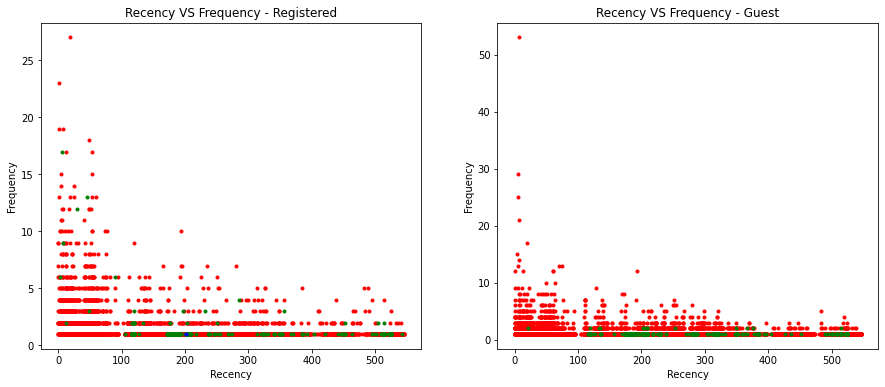

In [190]:
# RF

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
ax1.plot(reg_rfm['Recency'][reg_rfm['cluster'] == 0], 
         reg_rfm['Frequency'][reg_rfm['cluster'] == 0], 'r.')
ax1.plot(reg_rfm['Recency'][reg_rfm['cluster'] == 1], 
         reg_rfm['Frequency'][reg_rfm['cluster'] == 1], 'g.')
ax1.plot(reg_rfm['Recency'][reg_rfm['cluster'] == 2], 
         reg_rfm['Frequency'][reg_rfm['cluster'] == 2], 'b.')

ax2.plot(gst_rfm['Recency'][gst_rfm['cluster'] == 0], 
         gst_rfm['Frequency'][gst_rfm['cluster'] == 0], 'r.')
ax2.plot(gst_rfm['Recency'][gst_rfm['cluster'] == 1], 
         gst_rfm['Frequency'][gst_rfm['cluster'] == 1], 'b.')
ax2.plot(gst_rfm['Recency'][gst_rfm['cluster'] == 2], 
         gst_rfm['Frequency'][gst_rfm['cluster'] == 2], 'g.')

ax1.set_title('Recency VS Frequency - Registered')
ax2.set_title('Recency VS Frequency - Guest')

ax1.set_xlabel('Recency'), ax2.set_xlabel('Recency')
ax1.set_ylabel('Frequency'), ax2.set_ylabel('Frequency')

plt.show()

## RFM - ANALYSIS WITH QUANTILES METHOD

### OVERALL

In [191]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary,cluster
0.25,49.0,1.0,0.0,0.0
0.50,186.0,1.0,0.0,0.0
0.75,306.0,1.0,120000.0,0.0


In [192]:
quantiles.to_dict()

{'Recency': {0.25: 49.0, 0.5: 186.0, 0.75: 306.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 0.0, 0.5: 0.0, 0.75: 120000.0},
 'cluster': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0}}

In [193]:
#CREATING SEGMENTS USING QUANTILES

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments 
# (x = value, p = recency, monetary_value, 
# frequency, k = quartiles dict)

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [194]:
#create rfm segmentation table

rfm['R_Quartile'] = rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm['F_Quartile'] = rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm['M_Quartile'] = rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [195]:
rfm.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile
user_id,,,,,,,
000140bd498ce1c9eeae046aa37b205cc65d2595ed526a01cf1e5fdecb1a9a11,340,1,0.0,0,4,4,4
0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b851d2098e25a3eef599,39,1,0.0,0,1,4,4
00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece5b5150892463fddc53,22,1,0.0,0,1,4,4
0009bb2348a3a05d6b7dcc54394ff580c10440319f3878bf3dd7373af556b3b6,293,1,25000.0,0,3,4,2
000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba1f25a646f86e55c091,134,1,0.0,0,2,4,4


In [196]:
rfm['RFMScore'] =  rfm.R_Quartile.map(str) + rfm.F_Quartile.map(str) + rfm.M_Quartile.map(str)
rfm.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
user_id,,,,,,,,
000140bd498ce1c9eeae046aa37b205cc65d2595ed526a01cf1e5fdecb1a9a11,340,1,0.0,0,4,4,4,444
0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b851d2098e25a3eef599,39,1,0.0,0,1,4,4,144
00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece5b5150892463fddc53,22,1,0.0,0,1,4,4,144
0009bb2348a3a05d6b7dcc54394ff580c10440319f3878bf3dd7373af556b3b6,293,1,25000.0,0,3,4,2,342
000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba1f25a646f86e55c091,134,1,0.0,0,2,4,4,244


In [197]:
# Best Customer

rfm[rfm['RFMScore']=='111'].sort_values('Monetary', ascending=False).head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
user_id,,,,,,,,
0f08098e7c29825b93893e9f4539f8e19b991bc601b69b1dd0f0213d67a92920,6,17,3515000.0,2,1,1,1,111
a813d0c16d9ef64ea8d9f739977b508c13fc0949672fe9d5c9afb917c878ab04,3,6,3070000.0,2,1,1,1,111
a0d6037d227849e90a237023a530b72fad398dc82bcea6d2cb100cc679f403b5,48,3,3000000.0,2,1,1,1,111
3776cf9d9be23c587dafa4a57d4c23278cf0a1f7811a94a87634134fddbce7a1,21,2,3000000.0,2,1,1,1,111
a0ae07362cf5c54e9ab69d5088e8fbd907675ef733cf6cedc696af640d8d1ce0,8,9,3000000.0,2,1,1,1,111


In [198]:
# Lost Cheap Customer

rfm[rfm['RFMScore']=='444'].sort_values('Monetary', ascending=False).head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
user_id,,,,,,,,
000140bd498ce1c9eeae046aa37b205cc65d2595ed526a01cf1e5fdecb1a9a11,340,1,0.0,0,4,4,4,444
ae87338999d984839cf0649f54c8d5ed7a85a45688e4afe6515fd782172cbf06,436,1,0.0,0,4,4,4,444
ad89ad29deda2d77f24d968b33c1ffe1f2f1b7bad751e23e55f394dad6805e58,435,1,0.0,0,4,4,4,444
adb271d8be9314c1020ca8850b0fd306853178a51a0e44e58b13fd1a408cdf3f,439,1,0.0,0,4,4,4,444
adb3f6ad6b98195ae24ba1f88a50f5eaea47bf5d4741e98ade919424b893aafe,439,1,0.0,0,4,4,4,444


In [199]:
# Overall User

print("Best Customers: ",len(rfm[rfm['RFMScore']=='111']))
print('Loyal Customers: ',len(rfm[rfm['F_Quartile']==1]))
print("Big Spenders: ",len(rfm[rfm['M_Quartile']==1]))
print('Almost Lost: ',len(rfm[rfm['RFMScore']=='311']))
print('Lost Customers: ',len(rfm[rfm['RFMScore']=='411']))
print('Lost Cheap Customers: ',len(rfm[rfm['RFMScore']=='444']))

Best Customers:  98
Loyal Customers:  3100
Big Spenders:  7745
Almost Lost:  93
Lost Customers:  46
Lost Cheap Customers:  2200


In [200]:
rfm['RFMScore'].describe()

count     32171
unique       24
top         144
freq       6196
Name: RFMScore, dtype: object

### REGISTERED

In [201]:
reg_quantiles = reg_rfm.quantile(q=[0.25,0.5,0.75])
reg_quantiles

,Recency,Frequency,Monetary,cluster
0.25,49.0,1.0,0.0,0.0
0.50,179.0,1.0,30000.0,0.0
0.75,306.0,1.0,175000.0,0.0


In [202]:
reg_quantiles.to_dict()

{'Recency': {0.25: 49.0, 0.5: 179.0, 0.75: 306.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 0.0, 0.5: 30000.0, 0.75: 175000.0},
 'cluster': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0}}

In [203]:
#create rfm segmentation table

reg_rfm['R_Quartile'] = reg_rfm['Recency'].apply(RScore, args=('Recency',reg_quantiles,))
reg_rfm['F_Quartile'] = reg_rfm['Frequency'].apply(FMScore, args=('Frequency',reg_quantiles,))
reg_rfm['M_Quartile'] = reg_rfm['Monetary'].apply(FMScore, args=('Monetary',reg_quantiles,))

In [204]:
reg_rfm.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile
user_id,,,,,,,
000d596f61a329e66ddc8b83cf4a92eb2278646f26de22b2744d91f087655c48,544,1,200000.0,0,4,4,1
000e9d2d78e491e609fb4e51a50a618f7b7993f9b9fa2689f1710431a9e9466b,452,1,875000.0,0,4,4,1
00146b96f857a3f3f780b7e16ea8d5d2694f0dd373cad33b123e3dd6d5890dbf,162,1,30000.0,0,2,4,3
0018ea7b3a2c90c06b832395fad89f56118044018673ef302de87d69db0f4a56,119,1,1500000.0,1,2,4,1
001c27164a52edca6eddd042aba5368b23d42a154c1b25969775e72c26bba5c8,82,3,259000.0,0,2,1,1


In [205]:
reg_rfm['RFMScore'] =  reg_rfm.R_Quartile.map(str) + reg_rfm.F_Quartile.map(str) + reg_rfm.M_Quartile.map(str)
reg_rfm.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
user_id,,,,,,,,
000d596f61a329e66ddc8b83cf4a92eb2278646f26de22b2744d91f087655c48,544,1,200000.0,0,4,4,1,441
000e9d2d78e491e609fb4e51a50a618f7b7993f9b9fa2689f1710431a9e9466b,452,1,875000.0,0,4,4,1,441
00146b96f857a3f3f780b7e16ea8d5d2694f0dd373cad33b123e3dd6d5890dbf,162,1,30000.0,0,2,4,3,243
0018ea7b3a2c90c06b832395fad89f56118044018673ef302de87d69db0f4a56,119,1,1500000.0,1,2,4,1,241
001c27164a52edca6eddd042aba5368b23d42a154c1b25969775e72c26bba5c8,82,3,259000.0,0,2,1,1,211


In [206]:
reg_rfm[reg_rfm['RFMScore']=='111'].sort_values('Monetary', ascending=False).head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
user_id,,,,,,,,
0f08098e7c29825b93893e9f4539f8e19b991bc601b69b1dd0f0213d67a92920,6,17,3515000.0,1,1,1,1,111
a813d0c16d9ef64ea8d9f739977b508c13fc0949672fe9d5c9afb917c878ab04,3,6,3070000.0,1,1,1,1,111
a0ae07362cf5c54e9ab69d5088e8fbd907675ef733cf6cedc696af640d8d1ce0,8,9,3000000.0,1,1,1,1,111
a0d6037d227849e90a237023a530b72fad398dc82bcea6d2cb100cc679f403b5,48,3,3000000.0,1,1,1,1,111
9beff00e1d64815a754aee2127541f2f50d94f2e9b3ee27f60ae7fdb1c7a2478,30,12,2875000.0,1,1,1,1,111


In [207]:
reg_rfm[reg_rfm['RFMScore']=='444'].sort_values('Monetary', ascending=False).head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
user_id,,,,,,,,
00916878acf47b9847b9dd89c92c46c6b86c03a4159393646ab66f3bd9706dfc,522,1,0.0,0,4,4,4,444
ad89ad29deda2d77f24d968b33c1ffe1f2f1b7bad751e23e55f394dad6805e58,435,1,0.0,0,4,4,4,444
9ded4370221c5fc81696d4a459f12930dca1ed70e42c3d401c36e4648508b8e4,523,1,0.0,0,4,4,4,444
9e71445938b6d5153c323f4c89bdddc7a872d65c12e95ec081ffe966efcac217,325,1,0.0,0,4,4,4,444
9ff3a88ef0c819b0c4ef09a384e5c3684fe10d551f712576a175beee5eb0aa34,441,1,0.0,0,4,4,4,444


In [208]:
# Registered User

print("Best Customers: ",len(reg_rfm[reg_rfm['RFMScore']=='111']))
print('Loyal Customers: ',len(reg_rfm[reg_rfm['F_Quartile']==1]))
print("Big Spenders: ",len(reg_rfm[reg_rfm['M_Quartile']==1]))
print('Almost Lost: ',len(reg_rfm[reg_rfm['RFMScore']=='311']))
print('Lost Customers: ',len(reg_rfm[reg_rfm['RFMScore']=='411']))
print('Lost Cheap Customers: ',len(reg_rfm[reg_rfm['RFMScore']=='444']))

Best Customers:  34
Loyal Customers:  1354
Big Spenders:  1829
Almost Lost:  40
Lost Customers:  16
Lost Cheap Customers:  269


In [209]:
reg_rfm['RFMScore'].describe()

count     7773
unique      31
top        144
freq      1162
Name: RFMScore, dtype: object

### GUEST

In [210]:
gst_quantiles = gst_rfm.quantile(q=[0.25,0.5,0.75])
gst_quantiles

,Recency,Frequency,Monetary,cluster
0.25,49.0,1.0,0.0,0.0
0.50,195.0,1.0,0.0,0.0
0.75,306.0,1.0,100000.0,0.0


In [211]:
gst_quantiles.to_dict()

{'Recency': {0.25: 49.0, 0.5: 195.0, 0.75: 306.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 0.0, 0.5: 0.0, 0.75: 100000.0},
 'cluster': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0}}

In [212]:
#create rfm segmentation table

gst_rfm['R_Quartile'] = gst_rfm['Recency'].apply(RScore, args=('Recency',gst_quantiles,))
gst_rfm['F_Quartile'] = gst_rfm['Frequency'].apply(FMScore, args=('Frequency',gst_quantiles,))
gst_rfm['M_Quartile'] = gst_rfm['Monetary'].apply(FMScore, args=('Monetary',gst_quantiles,))

In [213]:
gst_rfm.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile
user_id,,,,,,,
000140bd498ce1c9eeae046aa37b205cc65d2595ed526a01cf1e5fdecb1a9a11,340,1,0.0,0,4,4,4
0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b851d2098e25a3eef599,39,1,0.0,0,1,4,4
00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece5b5150892463fddc53,22,1,0.0,0,1,4,4
0009bb2348a3a05d6b7dcc54394ff580c10440319f3878bf3dd7373af556b3b6,293,1,25000.0,0,3,4,2
000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba1f25a646f86e55c091,134,1,0.0,0,2,4,4


In [214]:
gst_rfm['RFMScore'] =  gst_rfm.R_Quartile.map(str) + gst_rfm.F_Quartile.map(str) + gst_rfm.M_Quartile.map(str)
gst_rfm.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
user_id,,,,,,,,
000140bd498ce1c9eeae046aa37b205cc65d2595ed526a01cf1e5fdecb1a9a11,340,1,0.0,0,4,4,4,444
0003b84440334ffdddcf8b3ffa9d7696a5675f451b69b851d2098e25a3eef599,39,1,0.0,0,1,4,4,144
00092ca94bb736eb3e89a9dd815d3f68d27a3aca6faece5b5150892463fddc53,22,1,0.0,0,1,4,4,144
0009bb2348a3a05d6b7dcc54394ff580c10440319f3878bf3dd7373af556b3b6,293,1,25000.0,0,3,4,2,342
000b0d458a510a0cb1f6124f88fe45ef4f2a97ad8716ba1f25a646f86e55c091,134,1,0.0,0,2,4,4,244


In [215]:
# Guest

print("Best Customers: ",len(gst_rfm[gst_rfm['RFMScore']=='111']))
print('Loyal Customers: ',len(gst_rfm[gst_rfm['F_Quartile']==1]))
print("Big Spenders: ",len(gst_rfm[gst_rfm['M_Quartile']==1]))
print('Almost Lost: ',len(gst_rfm[gst_rfm['RFMScore']=='311']))
print('Lost Customers: ',len(gst_rfm[gst_rfm['RFMScore']=='411']))
print('Lost Cheap Customers: ',len(gst_rfm[gst_rfm['RFMScore']=='444']))

Best Customers:  50
Loyal Customers:  1746
Big Spenders:  5767
Almost Lost:  47
Lost Customers:  29
Lost Cheap Customers:  1930


In [216]:
gst_rfm['RFMScore'].describe()

count     24398
unique       23
top         144
freq       5040
Name: RFMScore, dtype: object

In [219]:
gst_rfm[gst_rfm['RFMScore']=='444']

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
user_id,,,,,,,,
000140bd498ce1c9eeae046aa37b205cc65d2595ed526a01cf1e5fdecb1a9a11,340,1,0.0,0,4,4,4,444
00c7e23dbfe7f106f1af9610e759a50b0e4fff8615f4024151ff671d288172d5,378,1,0.0,0,4,4,4,444
013ee5614f826d87b212062337cf0938af55a5511c20b68ef82c402fd3983622,328,1,0.0,0,4,4,4,444
0146036061f45604b269a1dfdf4197335119bb991b940e230e025dced9bc15c5,327,1,0.0,0,4,4,4,444
0157774af0673c9f6eed8eea4917c74a8c7c21bbbb89b0ba489c99a7181f6fb7,323,1,0.0,0,4,4,4,444
...,...,...,...,...,...,...,...,...
ff178af44117677042cc542f2af03f9c6a12a84e9850d41340aacef16512cf9a,435,1,0.0,0,4,4,4,444
ff99560317d59c17aabb87bdfa26b547baf65e7d6507970df37675610a1ded77,507,1,0.0,0,4,4,4,444
ffb02d7ab4fe8f6f2c47e381f9bd83d751f65d3aad1378191cffe3eadbae7f3b,537,1,0.0,0,4,4,4,444


## RFM ANALYSIS SUMMARY

In [217]:
overall_sum = pd.DataFrame({'CATEGORY' : ['Best Customers', 'Loyal Customers', 'Big Spenders', 'Almost Lost', 'Lost Customers', 'Lost Cheap Customers'], 
                            'OVERALL'  : [len(rfm[rfm['RFMScore']=='111']), len(rfm[rfm['F_Quartile']==1]), len(rfm[rfm['M_Quartile']==1]), 
                                          len(rfm[rfm['RFMScore']=='311']), len(rfm[rfm['RFMScore']=='411']), len(rfm[rfm['RFMScore']=='444'])],
                            'REGISTER' : [len(reg_rfm[reg_rfm['RFMScore']=='111']), len(reg_rfm[reg_rfm['F_Quartile']==1]), len(reg_rfm[reg_rfm['M_Quartile']==1]), 
                                          len(reg_rfm[reg_rfm['RFMScore']=='311']), len(reg_rfm[reg_rfm['RFMScore']=='411']), len(reg_rfm[reg_rfm['RFMScore']=='444'])],
                            'GUEST'    : [len(gst_rfm[gst_rfm['RFMScore']=='111']), len(gst_rfm[gst_rfm['F_Quartile']==1]), len(gst_rfm[gst_rfm['M_Quartile']==1]), 
                                          len(gst_rfm[gst_rfm['RFMScore']=='311']), len(gst_rfm[gst_rfm['RFMScore']=='411']), len(gst_rfm[gst_rfm['RFMScore']=='444'])]})

In [218]:
overall_sum

,CATEGORY,OVERALL,REGISTER,GUEST
0,Best Customers,98,34,50
1,Loyal Customers,3100,1354,1746
2,Big Spenders,7745,1829,5767
3,Almost Lost,93,40,47
4,Lost Customers,46,16,29
5,Lost Cheap Customers,2200,269,1930


## MODEL EVALUATION

In [223]:
# Model

kmeans_def = model_KM.fit(df_clust[['age_when_register', 'price', 'total_ticket_sold', 'total_paid', 'profit']])
kmeans_rfm = model_KM_ovr.fit(rfm[['Frequency', 'Monetary']])

# Labels

def_labels = davies_bouldin_score(df_clust[['age_when_register', 'price', 'total_ticket_sold', 'total_paid', 'profit']], kmeans_def.labels_)
rfm_labels = davies_bouldin_score(rfm[['Frequency', 'Monetary']], kmeans_rfm.labels_)

print(f'Default K-MEANS Davies Bouldin Score : {def_labels}') 
print(f'RFM K-MEANS Davies Bouldin Score : {rfm_labels}') 

Default K-MEANS Davies Bouldin Score : 0.4791066693286831
RFM K-MEANS Davies Bouldin Score : 0.3685026544313959


## SUMMARY

> The Davies–Bouldin index is a metric for evaluating clustering algorithms. This is an internal evaluation scheme, where the validation of how well the clustering has been done is made using quantities and features inherent to the dataset. The higher the score the better the separation is. The intuition behind Davies-Bouldin index is the ratio between the within cluster distances and the between cluster distances and computing the average overall the clusters. It is therefore relatively simple to compute, bounded – 0 to 1, lower score is better. Therefore seeing the above result. We can infer that the RFM method model are better than the default one.

> In analyzing the RFM value we am using 2 methods which is Quantiles Method and K-Means Clustering. From those ways, we get 2 different clustering results. In Quantiles Method, we get 6 different group or clusters which is :

- Best Customers (98) : Bought most recently and most often, and spend the most
- Loyal Customers (3100) : Buy most frequently
- Big Spenders (7745) : Spend the most
- Almost Lost (93) : Haven’t purchased for some time, but purchased frequently and spend the most
- Lost Customers (46) : Haven’t purchased for some time, but purchased frequently and spend the most
- Lost Cheap Customers (2200) : Last purchased long ago, purchased few, and spent little

> This number of cluster and the name of each cluster is based on academic article written by Joao Correia (2016). for more details about clustering using Quantiles Method by Joao you can visit this site : https://www.blastanalytics.com/blog/rfm-analysis-boosts-sales .

> From this six clusters, we can give a data-driven Business Insights as follows :

- For Best Customers, we shouldn't give any price incentives. Instead, we can offer some new products, and loyalty programs.
- For Loyal Customers, we can offer some new products and try to give a price incentives on expensive products.
- For Big Spenders, we can market our most expensive products on this kind of customers
- For Almost Lost and Lost Customers, we should give an aggresive Price Incentive
- For Lost Cheap Customers, we shouldn't spend too much resources on trying to re-acquire this segment

> In spite of that, we also had another clustering method; K-Means Clustering. In this clustering, we try to make 3 clustering model based on R-F, M-R, and M-F. The clustering results shows us that the Frequency-Monetary clustering is the best result. This clustering is prefered due to higher information level provided in the results. in FM clustering, we get a clear 3 different groups as shown in the visualilzation above. This 3 different groups has different behavior as follows :

- Group 1 (red dots) : Customers with middle Frequency and low Monetary
- Group 2 (blue dots) : Customers with high Frequency and middle Monetary
- Group 3 (green dots) : Customers with low Frequency but has high Monetary

> From this three clusters, we can give a data-driven Business Insights as follows :

- For group 1, we should give we should give a recommendation of some new products and give a moderate price incentive 
- For group 2, we should give we can offer some new products, discounts and loyalty programs.
- For group 3, we should try to make innovation on our products and marketing such as collaboration with influencer and other public figure to attract these customers